In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
trainingSet = pd.read_csv('Google_Stock_Price_Train.csv')
trainingSet = trainingSet.iloc[:, 1 : 2]
testSet = pd.read_csv('Google_Stock_Price_Test.csv')
testSet = testSet.iloc[:, 1 : 2]

In [138]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
trainingSet = sc.fit_transform(trainingSet)
realStockPrice = sc.transform(testSet)

In [139]:
realStockPrice = np.concatenate((trainingSet[1238:], realStockPrice), axis = 0)

In [140]:
def createDataset (dataset, lookBack):
    xTrain, yTrain = [], []
    for number in range(len(dataset) - lookBack):
        xTrain.append(dataset[number:number + lookBack, 0])
        yTrain.append(dataset[number + lookBack])
    return np.array(xTrain), np.array(yTrain)

In [141]:
xTrain = createDataset(trainingSet, 20)[0]
yTrain = createDataset(trainingSet, 20)[1]
inputs = createDataset(realStockPrice, 20)[0]
inputs = inputs.reshape(20, 20, 1)

In [142]:
xTrain = xTrain.reshape(1238, 20, 1)

In [143]:
np.random.seed(7)

In [144]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [145]:
model = Sequential()

In [146]:
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (20, 1)))

In [147]:
model.add(Dense(units = 1))

In [148]:
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [149]:
model.fit(xTrain, yTrain, batch_size = 32, epochs = 100)

Epoch 1/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.3335
Epoch 2/100
1238/1238 [==============================] - 1s 507us/step - loss: 0.2067
Epoch 3/100
1238/1238 [==============================] - 1s 489us/step - loss: 0.1268
Epoch 4/100
1238/1238 [==============================] - 1s 478us/step - loss: 0.0877
Epoch 5/100
1238/1238 [==============================] - 1s 479us/step - loss: 0.0786
Epoch 6/100
1238/1238 [==============================] - 1s 485us/step - loss: 0.0744
Epoch 7/100
1238/1238 [==============================] - 1s 503us/step - loss: 0.0701
Epoch 8/100
1238/1238 [==============================] - 1s 477us/step - loss: 0.0658
Epoch 9/100
1238/1238 [==============================] - 1s 483us/step - loss: 0.0611 0s - los
Epoch 10/100
1238/1238 [==============================] - 1s 483us/step - loss: 0.0561
Epoch 11/100
1238/1238 [==============================] - 1s 496us/step - loss: 0.0509 0s - loss: 0.050
Epoch 12/100
1238/1238 [====

1238/1238 [==============================] - 1s 509us/step - loss: 4.2013e-04
Epoch 92/100
1238/1238 [==============================] - 1s 529us/step - loss: 4.1250e-04
Epoch 93/100
1238/1238 [==============================] - 1s 516us/step - loss: 4.1993e-04
Epoch 94/100
1238/1238 [==============================] - 1s 510us/step - loss: 4.2824e-04
Epoch 95/100
1238/1238 [==============================] - 1s 499us/step - loss: 4.2774e-04
Epoch 96/100
1238/1238 [==============================] - 1s 513us/step - loss: 4.1010e-04
Epoch 97/100
1238/1238 [==============================] - 1s 525us/step - loss: 4.1751e-04
Epoch 98/100
1238/1238 [==============================] - 1s 526us/step - loss: 4.2595e-04
Epoch 99/100
1238/1238 [==============================] - 1s 516us/step - loss: 4.1172e-04
Epoch 100/100
1238/1238 [==============================] - 1s 527us/step - loss: 4.1464e-04


In [152]:
predictedStockPrice = model.predict(inputs)
predictedStockPrice = sc.inverse_transform(predictedStockPrice)

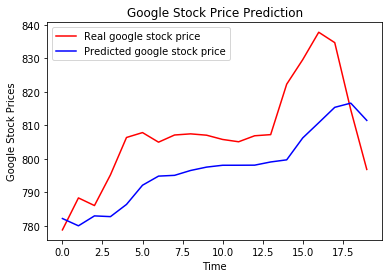

In [154]:
plt.plot(testSet, color = 'red', label = 'Real google stock price')
plt.plot(predictedStockPrice, color = 'blue', label = 'Predicted google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prices')
plt.legend()